### 2024 12 데이터

In [1]:
import pandas as pd
df1 = pd.read_excel('../../bigfile/(2024.12월말기준)_전국공장등록현황.xlsx')

df1.shape # (217048, 38)

# 지역명 전처리
# 강원도 + 강원특별자치도 -> 강원특별자치도
# 제주도 + 제주특별자치도 -> 제주특별자치도

df1['시도명'] = df1['시도명'].replace('강원도', '강원특별자치도')
df1['시도명'] = df1['시도명'].replace('제주도', '제주특별자치도')

df1['시도명'].unique()
# # ['서울특별시', '부산광역시', ' ', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
# #        '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라남도', '경상북도',
# #        '경상남도', '제주특별자치도', '전북특별자치도']

# # '시도명'이 빈 문자열인 데이터 제거
df1 = df1[df1['시도명'] != ' ']

# df1.shape # (217036, 38)

### 경기도 2024 12 데이터

In [2]:
gyeonggi_df1 = df1[df1['시도명']=='경기도']

# # # 시군구명에서 공백 뒤의 내용 삭제
# gyeonggi_df1['시군구명'] = gyeonggi_df1['시군구명'].str.split().str[0] # 32

# # # 여주군 데이터가 2개가 있는데 관리 기관이 경기도 여주시라서 여주시로 합쳐도 무관하다고 판단
# # # '여주군' 데이터를 '여주시' 데이터에 합치기
# gyeonggi_df1['시군구명'] = gyeonggi_df1['시군구명'].replace('여주군', '여주시')
# gyeonggi_df1.shape # (77885, 38)

# # gyeonggi_df1.to_csv('../../bigfile/경기_(2024.12월말기준)_전국공장등록현황.csv', index=False)

# 시군구명에서 공백을 기준으로 첫 번째 단어만 추출
gyeonggi_df1.loc[:, '시군구명'] = gyeonggi_df1['시군구명'].str.split().str[0]

# 특정 값을 다른 값으로 대체
gyeonggi_df1.loc[:, '시군구명'] = gyeonggi_df1['시군구명'].replace('여주군', '여주시')
gyeonggi_df1

,시도명,시군구명,관리기관,회사명,공장구분,단지명,설립구분,입주형태,보유구분,최초승인일,...,지식산업센터명,대표업종,업종명,업종코드,차수,법인주소,필지수,공장주소,공장주소_지번,공장관리번호
58628,경기도,수원시,경기도 수원시,(주)성진이엔씨,개별입지,,일반,일반건축물,임대,,...,,28123,배전반 및 전기 자동제어반 제조업,28123,10,,1,"경기도 수원시 장안구 경수대로1078번길 26, 201호(파장동, 세한상가)",경기도 수원시 장안구 파장동 279-3 세한상가 201호,2022931424
58629,경기도,수원시,경기도 수원시,(주)엔트리연구원,개별입지,,일반,,임대,,...,,28422,일반용 전기 조명장치 제조업 외 1 종,"28422, 28429",10,,1,"경기도 수원시 장안구 파장천로44번길 30 (파장동, 유로빌딩)",경기도 수원시 장안구 파장동 486-1번지 유로빌딩,411112015337377
58630,경기도,수원시,경기도 수원시,e덴쳐치과기공소,개별입지,,창업,임대사업자,임대,,...,,27191,치과용 기기 제조업,27191,10,,1,"경기도 수원시 장안구 장안로314번길 1, 201호(파장동, 홍미빌딩)",경기도 수원시 장안구 파장동 568-11 홍미빌딩 201호,411112023061542
58631,경기도,수원시,경기도 수원시,대우정보기술(주),개별입지,,일반,해당없음,임대,,...,,26410,유선 통신장비 제조업 외 1 종,"26410, 26429",10,,1,"경기도 수원시 장안구 경수대로 1123, 대영빌딩 201호 (파장동)",경기도 수원시 장안구 파장동 555-13번지,411102005099994
58632,경기도,수원시,경기도 수원시,미스터싸인,개별입지,,일반,분양,자가,,...,,33910,간판 및 광고물 제조업,33910,10,,1,경기도 수원시 장안구 파장천로 88-1(파장동),경기도 수원시 장안구 파장동 369-1,2021738971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136513,경기도,양평군,경기도 양평군,우드세라믹스,개별입지,,일반,해당없음,자가,,...,,23221,가정용 및 장식용 도자기 제조업,23221,10,,1,경기도 양평군 개군면 마루터길 46,경기도 양평군 개군면 계전리 488번지,418302004069890
136514,경기도,양평군,경기도 양평군,도기스쿨,개별입지,,일반,,자가,,...,,15190,기타 가죽제품 제조업,15190,10,,1,경기도 양평군 개군면 상자포리 323-1번지,경기도 양평군 개군면 상자포리 323-1번지,418302019434262
217045,경기도,안산시,한국산업단지공단 경기지역본부 시화지사,(주)유스틸,계획입지,시화멀티테크노밸리,국가산업단지,분양,자가,20131230,...,,24199,그 외 기타 1차 철강 제조업,24199,10,,0,"경기도 안산시 단원구 엠티브이8로 6, 시화MTV 6사207 (성곡동)",경기도 안산시 단원구 성곡동 시화MTV 6사207,412732013296422
217046,경기도,안산시,한국산업단지공단 경기지역본부 시화지사,영광솔루션,계획입지,시화멀티테크노밸리,국가산업단지,공장임대,임대,20201229,...,,24212,"알루미늄 제련, 정련 및 합금 제조업",24212,10,,0,"경기도 안산시 단원구 엠티브이7로 13, 6사 205호 (성곡동)",경기도 안산시 단원구 성곡동 6사 205호,412732020558822


### 설립형태별 면적현황

In [13]:
required_columns = ['설립구분', '용지면적', '제조시설면적', '부대시설면적']
df_filtered = gyeonggi_df1[required_columns]

# 설립구분 별 합계 계산
df_grouped = df_filtered.groupby(['설립구분']).sum().reset_index()

# 전체 합계를 기준으로 비율 계산
total_land = df_grouped['용지면적'].sum()
total_manufacture = df_grouped['제조시설면적'].sum()
total_facility = df_grouped['부대시설면적'].sum()

df_grouped['용지면적_비율'] = (df_grouped['용지면적'] / total_land * 100).round(4)
df_grouped['제조시설면적_비율'] = (df_grouped['제조시설면적'] / total_manufacture * 100).round(4)
df_grouped['부대시설면적_비율'] = (df_grouped['부대시설면적'] / total_facility * 100).round(4)

df_grouped[['용지면적', '제조시설면적', '부대시설면적']] = df_grouped[['용지면적', '제조시설면적', '부대시설면적']].astype(int)
df_grouped.to_csv('../../bigfile/설립구분별_면적.csv', index=False)

### 시군구별 보유구분 (임대/자가)

<Figure size 900x500 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

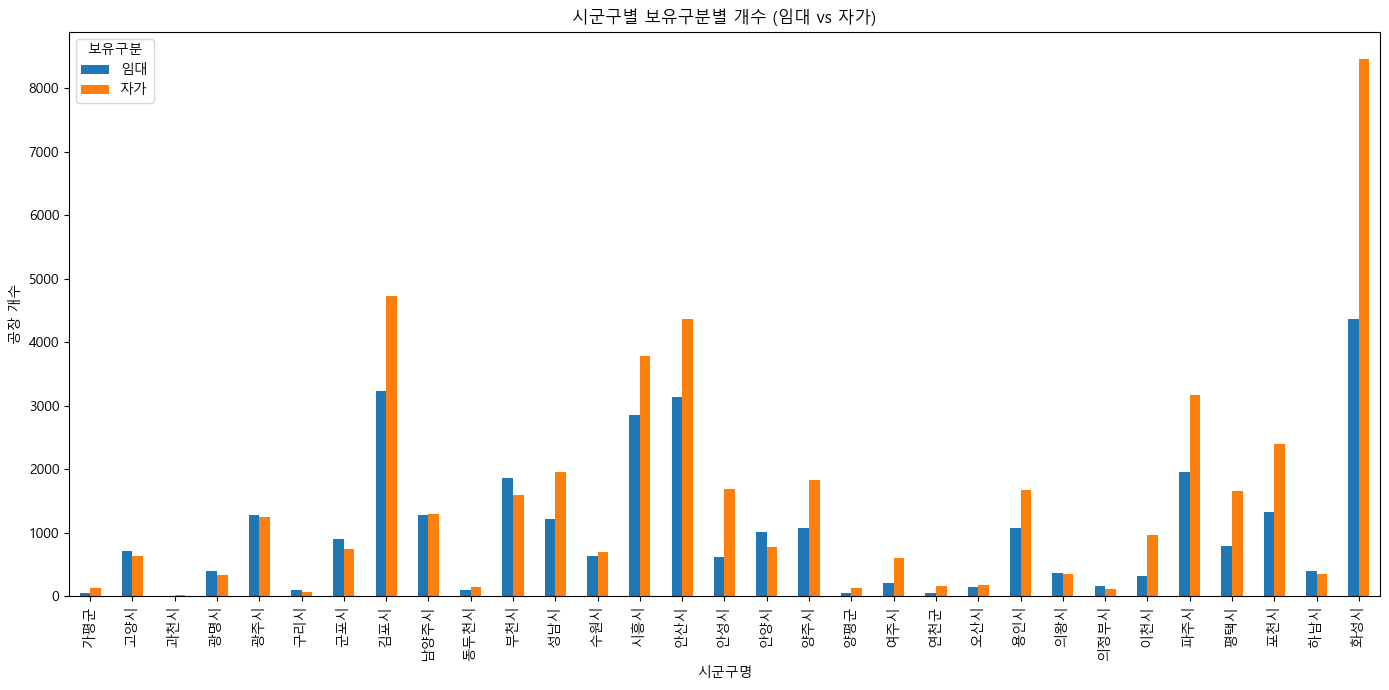

In [61]:
gyeonggi_df1['보유구분'].value_counts()
# 보유구분
# 자가    46213
# 임대    31671

result = gyeonggi_df1.groupby('시군구명')['보유구분'].value_counts().unstack(fill_value=0)


result['임대 비율'] = (result['임대']/result['임대'].sum()) * 100
result['자가 비율'] = (result['자가']/result['자가'].sum()) * 100
result['총 합계'] = result['임대'] + result['자가']
result['총 합계 비율'] = (result['총 합계']/result['총 합계'].sum()) * 100

result.to_excel('../../bigfile/시군구별_보유구분.xlsx')
result

## 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(9, 5))

df = pd.read_excel('../../bigfile/시군구별_보유구분.xlsx')

plt.figure(figsize=(12, 6))
df.set_index('시군구명')[['임대', '자가']].plot(kind='bar', figsize=(14, 7))
plt.title('시군구별 보유구분별 개수 (임대 vs 자가)')
plt.xlabel('시군구명')
plt.ylabel('공장 개수')
plt.legend(title='보유구분')
plt.tight_layout()
plt.show()

### 시군구별 공장구분별

In [68]:
gyeonggi_df1['공장구분'].value_counts()

result = gyeonggi_df1.groupby('시군구명')['공장구분'].value_counts().unstack(fill_value=0)

result['개별입지 비율'] = (result['개별입지']/result['개별입지'].sum()) * 100
result['계획입지 비율'] = (result['계획입지']/result['계획입지'].sum()) * 100

result['총 합계'] = result['개별입지'] + result['계획입지']
result['총 합계 비율'] = (result['총 합계']/result['총 합계'].sum()) * 100
result
result.to_excel('../../bigfile/시군구별_공장구분별.xlsx')

# ## 시각화
# import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic')
# plt.figure(figsize=(9, 5))

# df = pd.read_excel('../../bigfile/시군구별_공장구분별.xlsx')

# plt.figure(figsize=(12, 6))
# df.set_index('시군구명')[['개별입지', '계획입지']].plot(kind='bar', figsize=(14, 7))
# plt.title('시군구별 공장구분별 개수 (개별입지 vs 계획입지)')
# plt.xlabel('시군구명')
# plt.ylabel('공장 개수')
# plt.legend(title='공장구분')
# plt.tight_layout()
# plt.show()


In [70]:
gyeonggi_df1['용도지역'].unique()

array(['도시지역 / 주거지역 / 제1종일반주거지역', '도시지역 / 공업지역 / 일반공업지역',
       '도시지역 / 주거지역 / 제2종일반주거지역', '도시지역 / 녹지지역 / 자연녹지지역',
       '도시지역 / 상업지역 / 일반상업지역', ' / 도시지역 / 주거지역', '도시지역 / 주거지역 / 준주거지역',
       '도시지역 / 상업지역 / 근린상업지역', '도시지역 / 공업지역 / 준공업지역',
       '도시지역 / 녹지지역 / 생산녹지지역', '도시지역 / 주거지역 / 제3종일반주거지역', ' ',
       '도시지역 / 주거지역 / 제1종전용주거지역', '도시지역 / 상업지역 / 중심상업지역',
       '도시지역 / 공업지역 / 전용공업지역', ' / 도시지역 / 공업지역', '도시지역 / 녹지지역 / 보전녹지지역',
       ' / 관리지역 / 관리지역기타', ' / 관리지역 / 계획관리지역', ' / 도시지역 / 상업지역',
       ' / 관리지역 / 생산관리지역', '도시지역 / 상업지역 / 유통상업지역', ' / 국토이용용도지역기타',
       ' / 도시지역', '도시지역 / 주거지역 / 제2종전용주거지역', ' / 관리지역 / 보전관리지역',
       ' / 관리지역', ' / 농업진흥구역', ' / 농업보호구역', ' / 농림지역', ' / 임업용산지',
       ' / 역사문화환경보존지역', ' / 시도지정문화재구역', ' / 공익용산지', ' / 보호구역기타',
       ' / 자연환경보전지역'], dtype=object)

In [71]:
import numpy as np

# 원본 데이터 배열
regions = np.array(['도시지역 / 주거지역 / 제1종일반주거지역', '도시지역 / 공업지역 / 일반공업지역',
       '도시지역 / 주거지역 / 제2종일반주거지역', '도시지역 / 녹지지역 / 자연녹지지역',
       '도시지역 / 상업지역 / 일반상업지역', ' / 도시지역 / 주거지역', '도시지역 / 주거지역 / 준주거지역',
       '도시지역 / 상업지역 / 근린상업지역', '도시지역 / 공업지역 / 준공업지역',
       '도시지역 / 녹지지역 / 생산녹지지역', '도시지역 / 주거지역 / 제3종일반주거지역', ' ',
       '도시지역 / 주거지역 / 제1종전용주거지역', '도시지역 / 상업지역 / 중심상업지역',
       '도시지역 / 공업지역 / 전용공업지역', ' / 도시지역 / 공업지역', '도시지역 / 녹지지역 / 보전녹지지역',
       ' / 관리지역 / 관리지역기타', ' / 관리지역 / 계획관리지역', ' / 도시지역 / 상업지역',
       ' / 관리지역 / 생산관리지역', '도시지역 / 상업지역 / 유통상업지역', ' / 국토이용용도지역기타',
       ' / 도시지역', '도시지역 / 주거지역 / 제2종전용주거지역', ' / 관리지역 / 보전관리지역',
       ' / 관리지역', ' / 농업진흥구역', ' / 농업보호구역', ' / 농림지역', ' / 임업용산지',
       ' / 역사문화환경보존지역', ' / 시도지정문화재구역', ' / 공익용산지', ' / 보호구역기타',
       ' / 자연환경보전지역'])

# 카테고리별 필터링 조건
categories = {
    '도시': '도시지역',
    '관리': '관리지역',
    '농업': ['농업진흥구역', '농업보호구역', '농림지역'],
    '자연': ['녹지지역', '자연녹지지역', '생산녹지지역', '보전녹지지역', '자연환경보전지역'],
    '기타': []  # 나머지 항목들
}

# 각 카테고리에 맞는 항목을 분류하는 함수
def categorize(region):
    if '도시지역' in region:
        return '도시'
    elif '관리지역' in region:
        return '관리'
    elif any(keyword in region for keyword in categories['농업']):
        return '농업'
    elif any(keyword in region for keyword in categories['자연']):
        return '자연'
    else:
        return '기타'

# 각 항목에 대해 카테고리 분류
categorized_regions = [categorize(region) for region in regions]

# 결과 출력
print(categorized_regions)

['도시', '도시', '도시', '도시', '도시', '도시', '도시', '도시', '도시', '도시', '도시', '기타', '도시', '도시', '도시', '도시', '도시', '관리', '관리', '도시', '관리', '도시', '기타', '도시', '도시', '관리', '관리', '농업', '농업', '농업', '기타', '기타', '기타', '기타', '기타', '자연']
